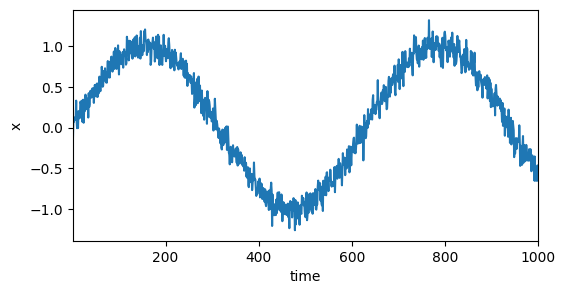

In [41]:
import torch
from torch import nn
T = 1000
time = torch.arange(1,T+1,dtype=torch.float32)
x = torch.sin(0.01 * time) + torch.normal(0,0.1,(T,))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 3))  
plt.plot(time.numpy(), x.numpy())  
plt.xlabel('time') 
plt.ylabel('x')    
plt.xlim([1, 1000])
plt.show()

In [58]:
tau = 4
features = torch.zeros((T-tau,tau))
for i in range(tau):
    features[:,i] = x[i:T -tau + i]
labels = x[tau:].reshape((-1,1))
batch_size, n_train = 600,600
from torch.utils import data
def load_array(data_arrays, batch_size, is_train=True):  #@save
    """构造一个PyTorch数据迭代器"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)
trainDataloader = load_array((features[:n_train],labels[:n_train]),batch_size)


In [43]:
def init_weight(m):
    if isinstance(m,nn.Linear):
        nn.init.xavier_uniform_(m.weight)

def get_net():
    net = nn.Sequential(nn.Linear(4,10),
                        nn.ReLU(),
                        nn.Linear(10,1))
    net.apply(init_weight)
    return net

lossfunction = nn.MSELoss()

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
from tqdm.auto import tqdm
def train(net,n_epoch,device,lr,trainDataloader):
    print(device)
    net = net.to(device)
    optimer = torch.optim.Adam(net.parameters(),lr)
    net.train()
    for i in tqdm(range(n_epoch)):
        for features,labels in trainDataloader:
            features = features.to(device)
            labels = labels.to(device)

            y_hat = net(features)
            loss = lossfunction(y_hat,labels).to(device)
            optimer.zero_grad()            
            loss.backward()
            optimer.step()
            print(f'epoch{i+1}',f"loss:{loss}")
net = get_net()            
train(net=net,n_epoch=50,device=device,lr=0.01,trainDataloader=trainDataloader)


cuda


100%|██████████| 100/100 [00:00<00:00, 1463.99it/s]

epoch1 loss:0.09940820187330246
epoch2 loss:0.06760813295841217
epoch3 loss:0.04530694708228111
epoch4 loss:0.029700197279453278
epoch5 loss:0.019478553906083107
epoch6 loss:0.014166650362312794
epoch7 loss:0.013055517338216305
epoch8 loss:0.015063340775668621
epoch9 loss:0.01870771311223507
epoch10 loss:0.022147106006741524
epoch11 loss:0.024080414324998856
epoch12 loss:0.02416524849832058
epoch13 loss:0.0227506160736084
epoch14 loss:0.020475391298532486
epoch15 loss:0.01798652857542038
epoch16 loss:0.015789758414030075
epoch17 loss:0.014181869104504585
epoch18 loss:0.01326034590601921
epoch19 loss:0.01297273114323616
epoch20 loss:0.013161737471818924
epoch21 loss:0.013603731989860535
epoch22 loss:0.014099109917879105
epoch23 loss:0.0144798643887043
epoch24 loss:0.014667780138552189
epoch25 loss:0.014608372002840042
epoch26 loss:0.014334642328321934
epoch27 loss:0.013845143839716911
epoch28 loss:0.013233548030257225
epoch29 loss:0.012604947201907635
epoch30 loss:0.012068333104252815
e

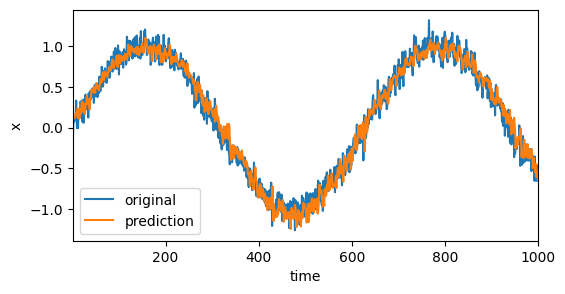

In [ ]:
onetep_preds = net(features.to(device))


plt.figure(figsize=(6, 3))  
plt.plot(
    time.detach().cpu().numpy(), 
    x.detach().cpu().numpy(),
    label='original'
)
plt.plot(
    time[tau:].detach().cpu().numpy(),
    onetep_preds.detach().cpu().numpy(),
    label='prediction'
)
plt.xlim([1, 1000])
plt.xlabel('time')
plt.ylabel('x')
plt.legend()
plt.show()

torch.Size([1000])


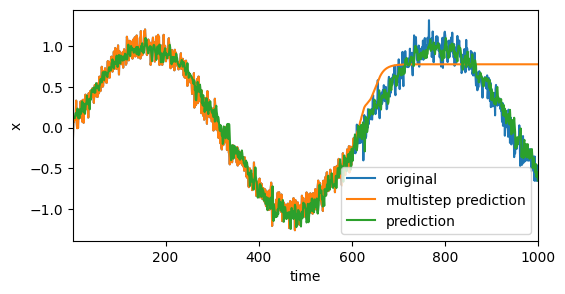

In [59]:
multistep_preds = torch.zeros(T,dtype=torch.float32)
multistep_preds[:n_train + tau] = x[:n_train + tau]
for i in range(n_train + tau ,T):
    multistep_preds[i] = net(multistep_preds[i - tau :i].reshape((1,-1)).to(device))
print(multistep_preds.shape)
plt.figure(figsize=(6, 3))  
plt.plot(
    time.detach().cpu().numpy(), 
    x.detach().cpu().numpy(),
    label='original'
)
plt.plot(
    time.detach().cpu().numpy(), 
    multistep_preds.detach().cpu().numpy(),
    label='multistep prediction'
)
plt.plot(
    time[tau:].detach().cpu().numpy(),
    onetep_preds.detach().cpu().numpy(),
    label='prediction'
)
plt.xlim([1, 1000])
plt.xlabel('time')
plt.ylabel('x')
plt.legend()
plt.show()
